## Loading Data

In [2]:
# loading data 
import pandas as pd

data = pd.read_csv('D:\WorkSpace_Trung\AI\Hand-on-ML\Chap-2\dataset\housing.csv')
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


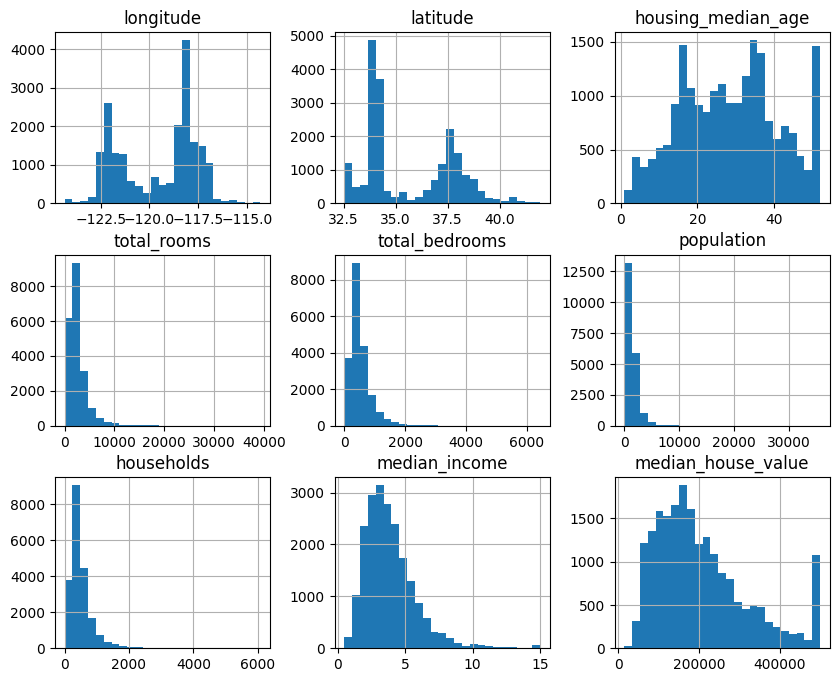

In [5]:
%matplotlib inline 
import matplotlib.pyplot as plt 
data.hist(bins = 25, figsize= (10, 8))
plt.show()

## Create a Test set

In [6]:
import numpy as np 
# sample create test set func

def split_train_test(data, test_ratio) : 
    shuffled_indx = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indx = shuffled_indx[:test_set_size]
    train_indx = shuffled_indx[test_set_size:]
    return data.iloc[train_indx], data.iloc[test_indx]
train_set, test_set = split_train_test(data, 0.2)


In [7]:
from zlib import crc32

# tạo giá trị băm
def test_set_check(id, test_ratio) : 
    return crc32(np.int64(id)) & 0xffffffff < test_ratio * 2**32

def split_train_test_by_id(data, test_ratio, id_cols) : 
    ids = data[id_cols]
    in_test_set = ids.apply(lambda id_ : test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

data_with_id = data.reset_index()
train_set, test_set = split_train_test_by_id(data_with_id, 0.2, "index")
#train_set.head()
test_set.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
2,2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
5,5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
12,12,-122.26,37.85,52.0,2491.0,474.0,1098.0,468.0,3.0750,213500.0,NEAR BAY
16,16,-122.27,37.85,52.0,1966.0,347.0,793.0,331.0,2.7750,152500.0,NEAR BAY
23,23,-122.27,37.84,52.0,1688.0,337.0,853.0,325.0,2.1806,99700.0,NEAR BAY


In [8]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(data, test_size= 0.2, random_state= 42)
train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,103000.0,NEAR OCEAN
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,382100.0,NEAR OCEAN
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,172600.0,NEAR OCEAN
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,93400.0,NEAR OCEAN
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,96500.0,INLAND


## Exploring the data

In [9]:
train_set.head()
len(train_set)

16512

<Axes: xlabel='longitude', ylabel='latitude'>

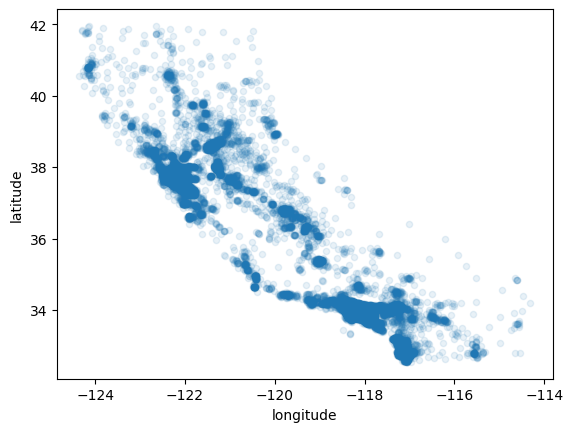

In [10]:
train_set.plot(kind = 'scatter', x = 'longitude', y = 'latitude', alpha = 0.1)

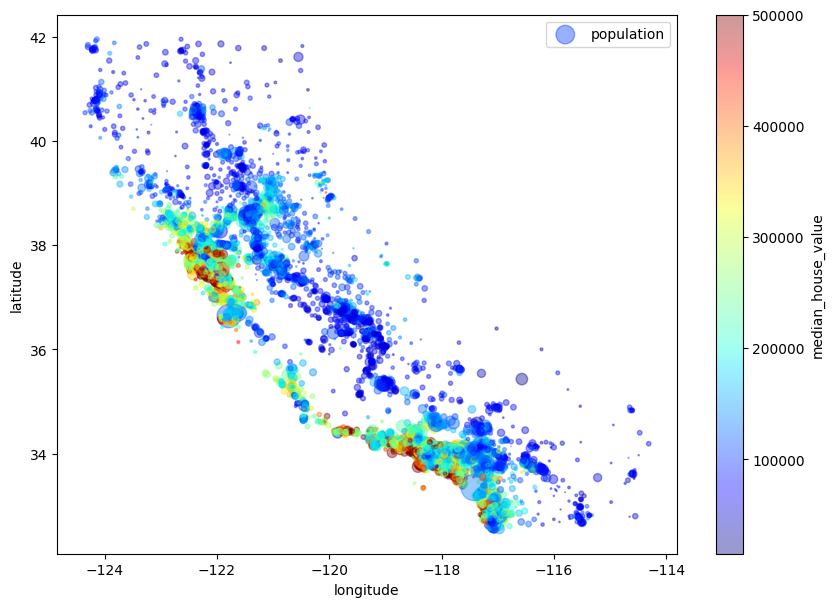

In [11]:
train_set.plot(kind = "scatter", x = 'longitude', y = "latitude", alpha = 0.4, 
               s = train_set["population"] / 100, label = "population", figsize = (10, 7), 
               c = "median_house_value", cmap = plt.get_cmap("jet"), colorbar = True)
plt.legend()

In [12]:
# correlation
corr_matrix = data.corr(numeric_only = True)
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

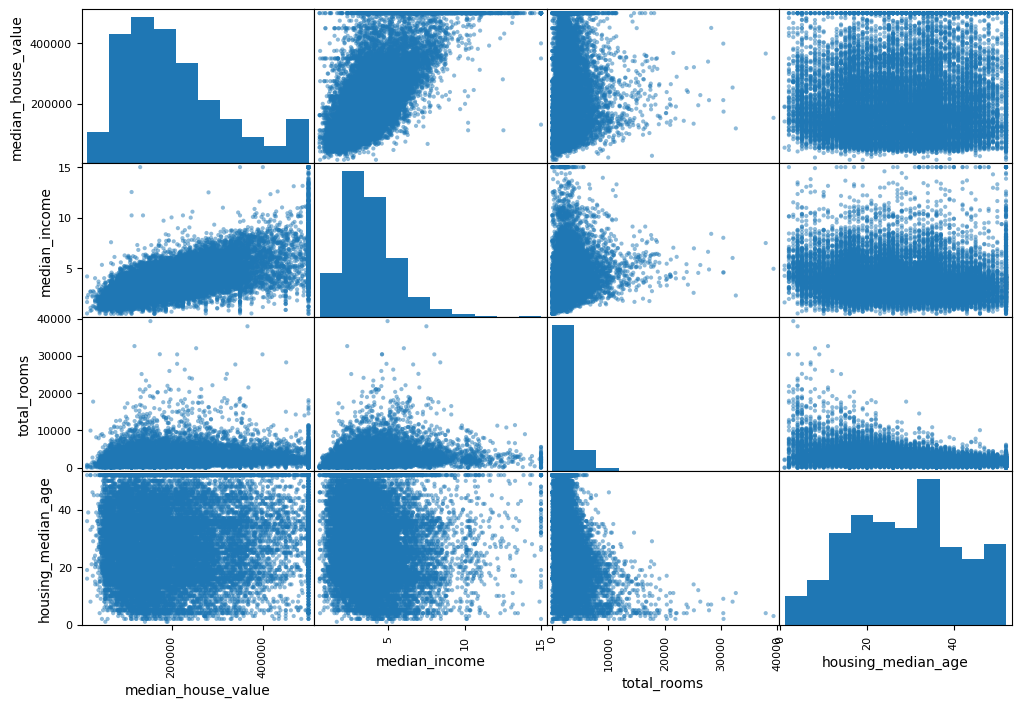

In [13]:
# visual correlation with pandas
from pandas.plotting import scatter_matrix

att = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(data[att], figsize=(12,8))

In [14]:
# Attribute combination
data['room_per_household'] = data['total_rooms'] / data['households']
data['bedroom_per_room'] = data['total_bedrooms'] / data['total_rooms']
data['population_per_household'] = data['population'] / data['households']

corr_matrix = data.corr(numeric_only= True)
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,room_per_household,bedroom_per_room,population_per_household
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967,-0.027540,0.092657,0.002476
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160,0.106389,-0.113815,0.002366
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623,-0.153277,0.136089,0.013191
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153,0.133798,-0.187900,-0.024581
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686,0.001538,0.084238,-0.028355
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650,-0.072213,0.035319,0.069863
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843,-0.080598,0.065087,-0.027309
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075,0.326895,-0.615661,0.018766
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000,0.151948,-0.255880,-0.023737
room_per_household,-0.027540,0.106389,-0.153277,0.133798,0.001538,-0.072213,-0.080598,0.326895,0.151948,1.000000,-0.416952,-0.004852


## Prepare Data for ML Algorithms

In [15]:
data = train_set.drop("median_house_value", axis = 1)
data_label = train_set["median_house_value"].copy()

# Cleaning 
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy= "median")

# calculate median each columns 
data_num = data.drop("ocean_proximity", axis = 1)
imputer.fit(data_num)

# transform training set
X = imputer.transform(data_num)

data_num_tr = pd.DataFrame(X, columns= data_num.columns)
data_num_tr


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596
1,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125
2,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563
3,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425
4,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542
...,...,...,...,...,...,...,...,...
16507,-117.96,33.78,35.0,1330.0,201.0,658.0,217.0,6.3700
16508,-117.43,34.02,33.0,3084.0,570.0,1753.0,449.0,3.0500
16509,-118.38,34.03,36.0,2101.0,569.0,1756.0,527.0,2.9344
16510,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192


In [16]:
# handling text 
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
data_cat = data[['ocean_proximity']]

data_cat_encode = ordinal_encoder.fit_transform(data_cat)
data_cat_encode[:10]
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [17]:
# one hot encoding 
from sklearn.preprocessing import OneHotEncoder
on_encoder = OneHotEncoder()
data_cat_1hot = on_encoder.fit_transform(data_cat)
data_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [18]:
# custom transformers 
from sklearn.base import BaseEstimator, TransformerMixin
room_ix, bedroom_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAtributeAdder (BaseEstimator, TransformerMixin) : 
    def __init__(self, add_bedrooms_per_room = True) : 
        self.add_bedrooms_per_room = add_bedrooms_per_room

    def fit(self, X, y = None) : 
        return self

    def transform (self, X, y = None) : 
        room_per_household = X[:, room_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]

        if self.add_bedrooms_per_room : 
            bedrooms_per_room = X[:, bedroom_ix] / X[:, room_ix]
            return np.c_[X, room_per_household, population_per_household, bedrooms_per_room]
        else : 
            return np.c_[X, room_per_household, population_per_household]
        

attr_adder = CombinedAtributeAdder(add_bedrooms_per_room = False)
hoursing_extra_attribs = attr_adder.transform(data.values)

In [19]:
# Transformation Pipeline 
from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy = "median")), 
    ('attribs_adder', CombinedAtributeAdder()), 
    ('std_scaler', StandardScaler())
])

data_num_tr = num_pipeline.fit_transform(data_num)

In [20]:
# 
from sklearn.compose import ColumnTransformer

num_att = list(data_num)
cat_att = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_att), 
    ("cat", OneHotEncoder(), cat_att)
])
data_prepare = full_pipeline.fit_transform(data)
data_prepare

array([[ 1.27258656, -1.3728112 ,  0.34849025, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.70916212, -0.87669601,  1.61811813, ...,  0.        ,
         0.        ,  1.        ],
       [-0.44760309, -0.46014647, -1.95271028, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 0.59946887, -0.75500738,  0.58654547, ...,  0.        ,
         0.        ,  0.        ],
       [-1.18553953,  0.90651045, -1.07984112, ...,  0.        ,
         0.        ,  0.        ],
       [-1.41489815,  0.99543676,  1.85617335, ...,  0.        ,
         1.        ,  0.        ]])

## Select and Train Model

In [21]:
# training model
from sklearn.linear_model import LinearRegression 

lin_reg = LinearRegression()
lin_reg.fit(data_prepare,data_label)

test_data = data.iloc[:5]
test_label = data_label[:5]
test_prepare = full_pipeline.transform(test_data)

print("Prediction:", lin_reg.predict(test_prepare))

Prediction: [181746.54359616 290558.74973505 244957.50017771 146498.51061398
 163230.42393939]


In [22]:
# check 
print("Labels", list(test_label))

Labels [103000.0, 382100.0, 172600.0, 93400.0, 96500.0]


In [23]:
# loss function 
from sklearn.metrics import mean_squared_error

data_predict = lin_reg.predict(data_prepare)
lin_mse = mean_squared_error(data_label, data_predict)
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)

67593.20745775253


In [24]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(data_prepare, data_label)

data_predict = tree_reg.predict(data_prepare)
tree_mse = mean_squared_error(data_label, data_predict)
tree_mse

0.0

In [26]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, data_prepare, data_label, scoring = "neg_mean_squared_error", cv = 10)
tree_rmse_score = np.sqrt(-scores)

In [28]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(data_prepare, data_label)

data_predict = forest_reg.predict(data_prepare)
forest_mse = mean_squared_error(data_label, data_predict)
forest_mse

scores = cross_val_score(tree_reg, data_prepare, data_label, scoring = "neg_mean_squared_error", cv = 10)
tree_rmse_score = np.sqrt(-scores)

In [29]:
cores = cross_val_score(tree_reg, data_prepare, data_label, scoring = "neg_mean_squared_error", cv = 10)
tree_rmse_score = np.sqrt(-scores)
tree_rmse_score

array([64177.46539151, 70128.14872953, 68845.57469337, 72554.38783828,
       74200.34024661, 68349.95004056, 68096.26720802, 67435.09450641,
       65038.53802277, 70733.4758237 ])

## Fine-Tune Model

### Grid Search

In [32]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators' : [3, 10, 30], 'max_features' : [2, 4, 6, 8]}, 
    {'bootstrap' : [False], 'n_estimators' : [3, 10], 'max_features' : [2, 3, 4]}
]

forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv = 5, scoring = 'neg_mean_squared_error', return_train_score= True)
grid_search.fit(data_prepare, data_label)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [33]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}